# Steve Jigy Antony Task 1

## <font color='green'> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#00000000'
matplotlib.rcParams['figure.figsize']= (12,6)

## <font color='green'> Reading data

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##  <font color='green'>Relation between number of hours and scores

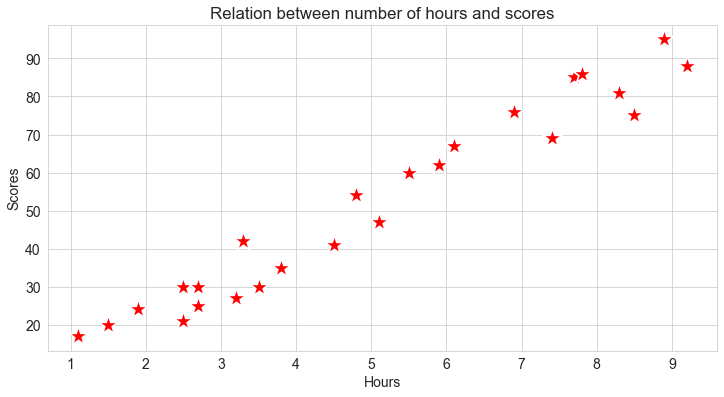

In [4]:
sns.scatterplot(x='Hours',y='Scores',data=df,marker='*',color='red',s=400).set_title('Relation between number of hours and scores');

##  <font color='green'> Correlation

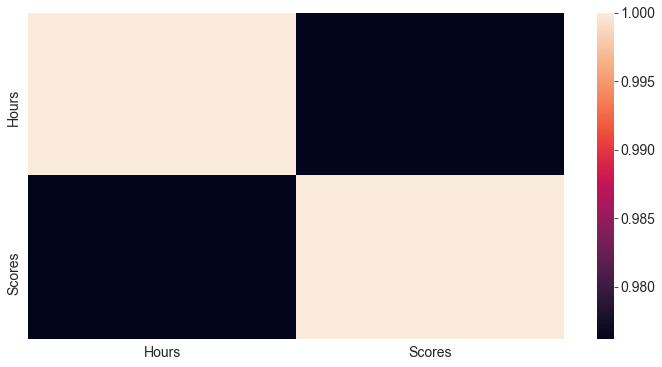

In [5]:
sns.heatmap(df.corr());

##  <font color='green'>Splitting training and testing data

In [6]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##  <font color='green'>Linear Regression model

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [9]:
regressor.fit(X_train,y_train)

LinearRegression()

## <font color='green'> Regression Line

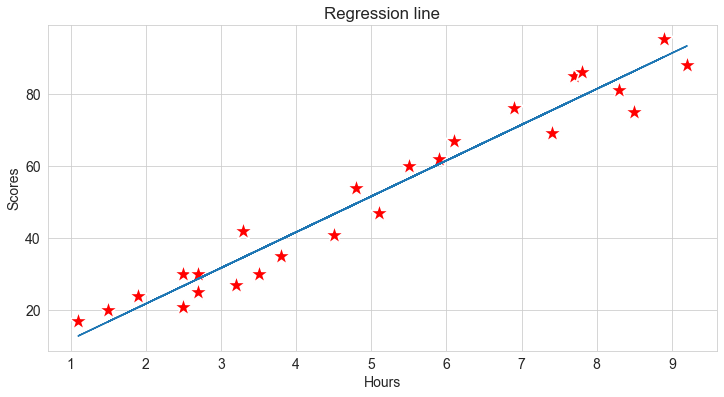

In [10]:
line = regressor.coef_*X+regressor.intercept_
sns.scatterplot(x='Hours',y='Scores',data=df,marker='*',color='red',s=400);
plt.plot(X,line);
plt.title('Regression line');

In [11]:
prediction=regressor.predict(X_test)
prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Test values and Predicted values

In [12]:
df1=pd.DataFrame({'Number_of_hours': X_test.flatten(),'Test_values': y_test,'Predicted_values': prediction})
df1

,Number_of_hours,Test_values,Predicted_values
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


## Performance metrics

In [13]:
from sklearn.metrics import r2_score
print('R2 score is',r2_score(y_test,prediction))
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean absolute error is',mean_absolute_error(y_test,prediction))
print('RMSE is',mean_squared_error(y_test,prediction, squared=False))

R2 score is 0.9454906892105356
Mean absolute error is 4.183859899002975
RMSE is 4.6474476121003665


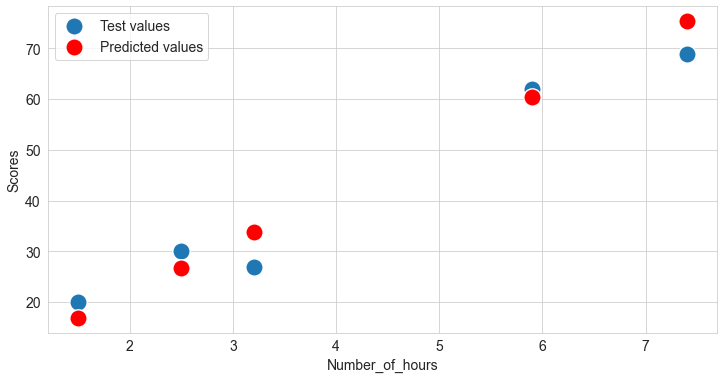

In [14]:
sns.scatterplot(x='Number_of_hours',y='Test_values',data=df1,label='Test values',s=300);
sns.scatterplot(x='Number_of_hours',y='Predicted_values', data=df1, color='red',label='Predicted values',s=300);
plt.ylabel('Scores');

#### Predicted score if student studies for 1 hour

In [15]:
print(regressor.predict([[1]]))

[11.92881652]


#### Predicted score if student studies for 5 hours

In [16]:
print(regressor.predict([[5]]))

[51.57144244]


#### Predicted score if student studies for 9.25 hours

In [17]:
print(regressor.predict([[9.25]]))

[93.69173249]


# <font color='red'> Thank You